In [59]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [8]:
df=pd.read_csv('/home/rishibaijal/Documents/CDAC/Module 11: AA/LabExam/Euro/euro-daily-hist_1999_2020.csv', parse_dates=["Period\\Unit:"])

In [9]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-02-12,1.5666,1.9558,6.5302,1.5418,1.0803,7.8207,NaN,25.753,7.4361,...,4.8746,89.8055,10.0818,1.6066,NaN,NaN,36.2150,8.5010,1.2108,17.7362
1,2021-02-11,1.5638,1.9558,6.4936,1.5384,1.0802,7.8448,NaN,25.772,7.4380,...,4.8745,89.3792,10.0868,1.6080,NaN,NaN,36.2710,8.5254,1.2147,17.7533
2,2021-02-10,1.5682,1.9558,6.5641,1.5394,1.0805,7.8235,NaN,25.835,7.4373,...,4.8752,89.5116,10.0800,1.6080,NaN,NaN,36.2660,8.5503,1.2127,17.8301
3,2021-02-09,1.5681,1.9558,6.5530,1.5414,1.0817,7.7894,NaN,25.738,7.4369,...,4.8753,89.6164,10.1058,1.6074,NaN,NaN,36.2390,8.5883,1.2104,17.8953
4,2021-02-08,1.5693,1.9558,6.4955,1.5363,1.0842,7.7618,NaN,25.739,7.4365,...,4.8748,89.4049,10.1148,1.6067,NaN,NaN,36.0980,8.5308,1.2025,17.9701


In [10]:
df.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

In [11]:
df.isna().sum()

Period\Unit:                   0
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3378
[Czech koruna ]                0
[Danish krone ]                0
[Estonian kroon ]           2594
[UK pound sterling ]           0
[Greek drachma ]            5204
[Hong Kong dollar ]            0
[Croatian kuna ]             268
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         1565
[Latvian lats ]             1820
[Maltese lira ]             3378
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian krone ]             0
[New Zealand dollar ]          0
[Philippine peso ]             0
[Polish zl

Since we are required to select only one currency and perform operations on it, I will be performing all operations on the US Dollar. 

In [12]:
df_new=df[["Period\\Unit:", "[US dollar ]"]]

In [13]:
df_new.head()

,Period\Unit:,[US dollar ]
0,2021-02-12,1.2108
1,2021-02-11,1.2147
2,2021-02-10,1.2127
3,2021-02-09,1.2104
4,2021-02-08,1.2025


In [14]:
df_new.columns=["Date", "US dollar"]

In [15]:
df_new.head()

,Date,US dollar
0,2021-02-12,1.2108
1,2021-02-11,1.2147
2,2021-02-10,1.2127
3,2021-02-09,1.2104
4,2021-02-08,1.2025


In [18]:
df_new.index=df_new["Date"]
df_new.drop("Date", axis=1, inplace=True)

/home/rishibaijal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df_new.head()

,US dollar
Date,
2021-02-12,1.2108
2021-02-11,1.2147
2021-02-10,1.2127
2021-02-09,1.2104
2021-02-08,1.2025


In [29]:
df_new["US dollar"]=df_new["US dollar"].rank(method="dense").astype(int)

/home/rishibaijal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_new.dtypes

US dollar    int64
dtype: object

Visualisations
---

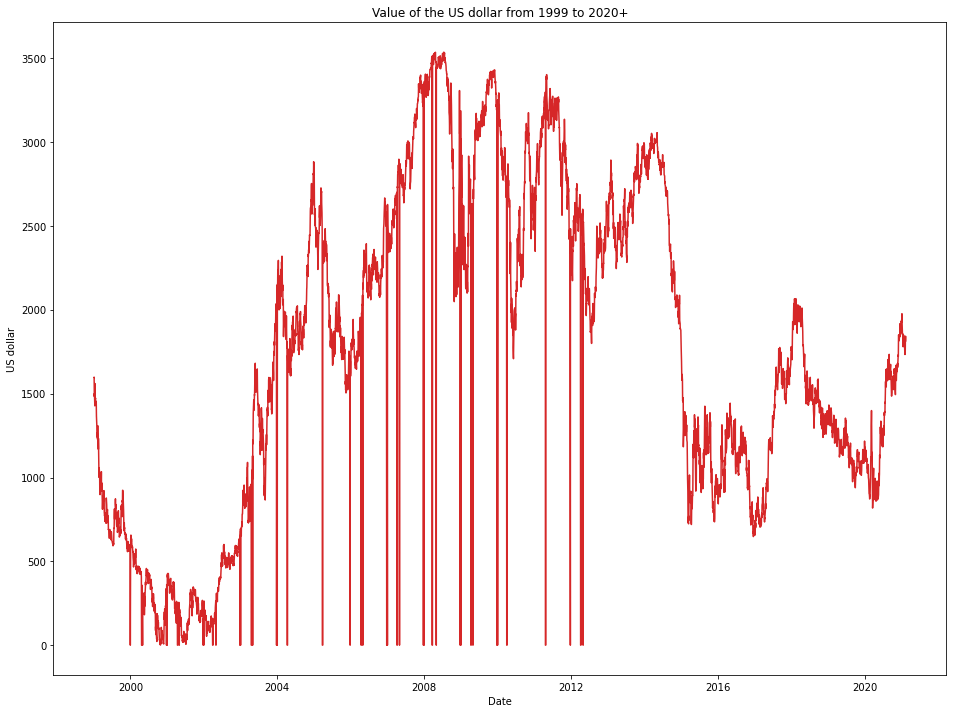

In [31]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='US dollar'):
    plt.figure(figsize=(16,12))
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_new, x=df_new.index, y=df_new["US dollar"], title='Value of the US dollar from 1999 to 2020+')  

In [34]:
df_new.reset_index(inplace=True)

In [37]:
df_new.head()

,Date,US dollar
0,2021-02-12,1814
1,2021-02-11,1842
2,2021-02-10,1829
3,2021-02-09,1811
4,2021-02-08,1756


In [38]:
df_new['year'] = [d.year for d in df_new["Date"]]
df_new['month'] = [d.strftime('%B') for d in df_new["Date"]]
years = df_new['year'].unique()
print(years)

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2001 2000 1999]


/home/rishibaijal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/rishibaijal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df_new.head()

,Date,US dollar,year,month
0,2021-02-12,1814,2021,February
1,2021-02-11,1842,2021,February
2,2021-02-10,1829,2021,February
3,2021-02-09,1811,2021,February
4,2021-02-08,1756,2021,February


In [40]:
df_new.tail()

,Date,US dollar,year,month
5719,1999-01-08,1501,1999,January
5720,1999-01-07,1483,1999,January
5721,1999-01-06,1559,1999,January
5722,1999-01-05,1598,1999,January
5723,1999-01-04,1597,1999,January


In [41]:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

In [47]:
df=df_new

In [48]:
df

,Date,US dollar,year,month
0,2021-02-12,1814,2021,February
1,2021-02-11,1842,2021,February
2,2021-02-10,1829,2021,February
3,2021-02-09,1811,2021,February
4,2021-02-08,1756,2021,February
...,...,...,...,...
5719,1999-01-08,1501,1999,January
5720,1999-01-07,1483,1999,January
5721,1999-01-06,1559,1999,January
5722,1999-01-05,1598,1999,January


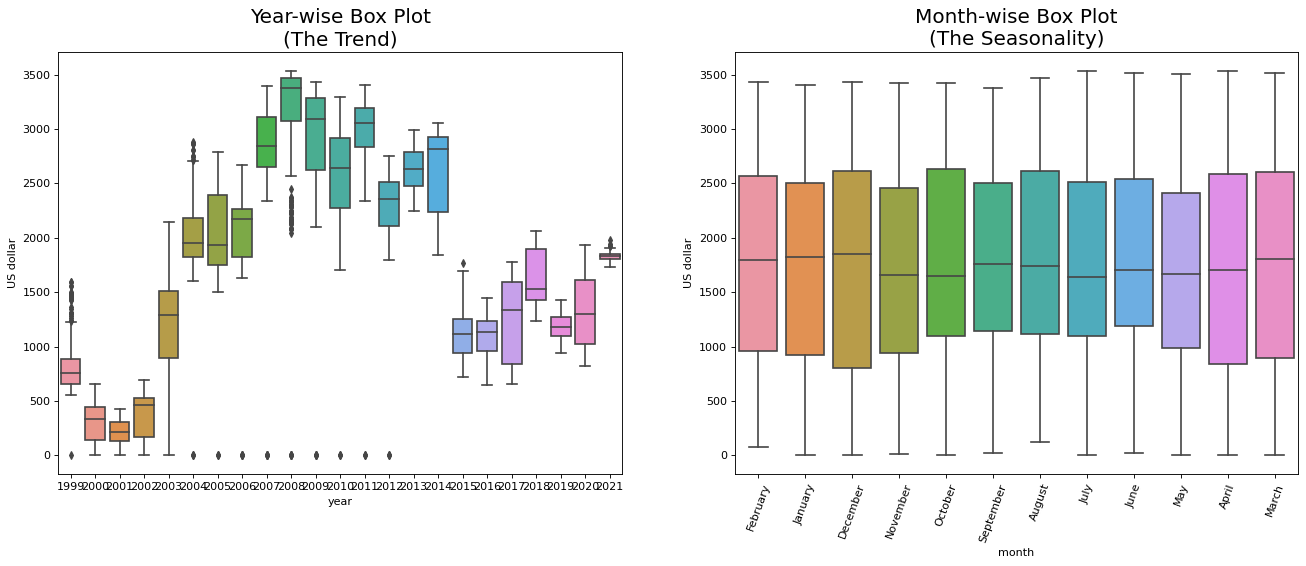

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='US dollar', data=df, ax=axes[0])
plt.xticks(rotation=70)
sns.boxplot(x='month', y='US dollar', data=df)
plt.xticks(rotation=70)

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [62]:
result_mul = seasonal_decompose(df['US dollar'], model='multiplicative', extrapolate_trend='freq', period=12)

In [63]:
result_add = seasonal_decompose(df['US dollar'], model='additive', extrapolate_trend='freq', period=12)

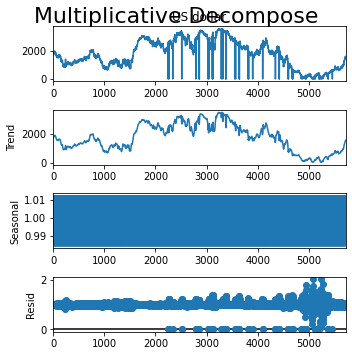

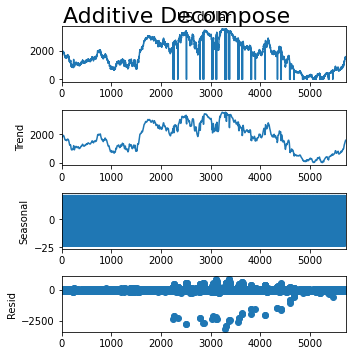

In [64]:
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [65]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
0,1.009531,1759.026272,1.021516,1814.0
1,1.012264,1763.285159,1.031985,1842.0
2,1.004098,1767.544046,1.030546,1829.0
3,1.008080,1771.802933,1.013930,1811.0
4,0.996144,1776.061820,0.992532,1756.0


<AxesSubplot:ylabel='seas'>

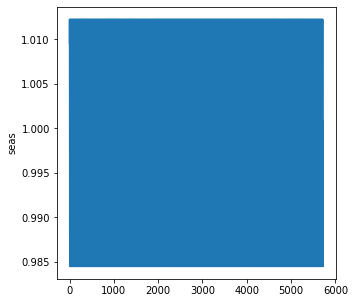

In [72]:
sns.lineplot(x=df_reconstructed.index, y=df_reconstructed["seas"])

<AxesSubplot:ylabel='trend'>

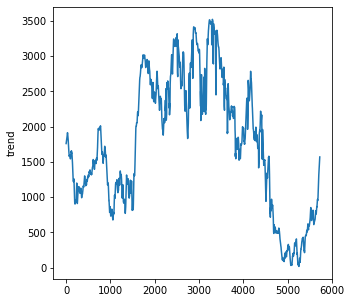

In [73]:
sns.lineplot(x=df_reconstructed.index, y=df_reconstructed["trend"])

<AxesSubplot:ylabel='resid'>

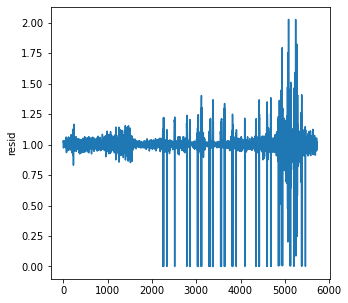

In [74]:
sns.lineplot(x=df_reconstructed.index, y=df_reconstructed["resid"])

<AxesSubplot:ylabel='actual_values'>

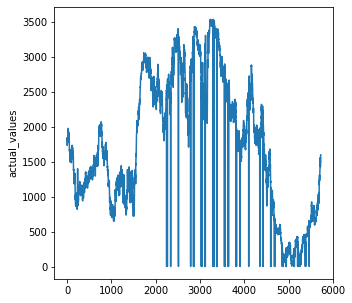

In [75]:
sns.lineplot(x=df_reconstructed.index, y=df_reconstructed["actual_values"])

Making the time series stationary
---

In [84]:
from statsmodels.tsa.stattools import adfuller, kpss
def is_stat(df_column):
    result = adfuller(df_column.values, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

    result = kpss(df_column.values, regression='c')
    print('\nKPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
is_stat(df["US dollar"])

ADF Statistic: -1.8859044508352687
p-value: 0.33872087817002405
Critial Values:
   1%, -3.431496354256003
Critial Values:
   5%, -2.8620465784344273
Critial Values:
   10%, -2.56703964993912

KPSS Statistic: 3.808847
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Since the ADF statistic is higher than all the critical values, this TS is not stationary. 

Detrending the time series - Using least square method
---

Text(0.5, 1.0, 'US Dollar timeseries after detrending using scipy')

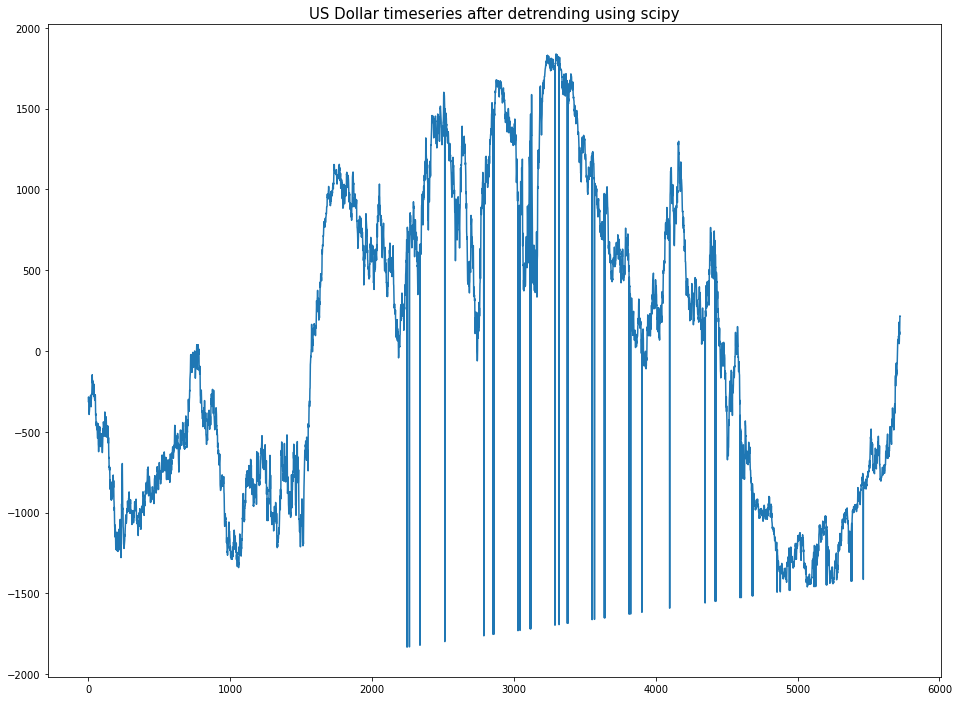

In [80]:
from scipy import signal
detrended=signal.detrend(df["US dollar"].values)
plt.figure(figsize=(16, 12))
plt.plot(detrended)
plt.title("US Dollar timeseries after detrending using scipy", fontsize=15)

In [82]:
df["detrended_ls"]=detrended

In [85]:
is_stat(df["detrended_ls"])

ADF Statistic: -1.9563742353262985
p-value: 0.3060227625913774
Critial Values:
   1%, -3.431496354256003
Critial Values:
   5%, -2.8620465784344273
Critial Values:
   10%, -2.56703964993912

KPSS Statistic: 3.178485
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


Detrending the time series - Using rolling average
---

In [87]:
df['RA'] = df["US dollar"].rolling(12).mean()
df['RA_detrend'] = df["US dollar"] - df.RA
df.head()

,Date,US dollar,year,month,detrended_ls,RA,RA_detrend
0,2021-02-12,1814,2021,February,-311.854111,NaN,NaN
1,2021-02-11,1842,2021,February,-283.723792,NaN,NaN
2,2021-02-10,1829,2021,February,-296.593474,NaN,NaN
3,2021-02-09,1811,2021,February,-314.463156,NaN,NaN
4,2021-02-08,1756,2021,February,-369.332838,NaN,NaN


In [89]:
df["RA_detrend"].fillna(df["RA_detrend"].median(), inplace=True)
is_stat(df["RA_detrend"])

ADF Statistic: -19.284256619095412
p-value: 0.0
Critial Values:
   1%, -3.4314971586542895
Critial Values:
   5%, -2.8620469338326067
Critial Values:
   10%, -2.5670398391281397

KPSS Statistic: 0.069942
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


Here we see that a rolling average with a 12 month period successfully detrends the series. 

<AxesSubplot:>

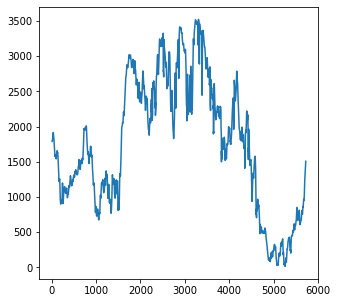

In [91]:
df["RA"].plot()

<AxesSubplot:>

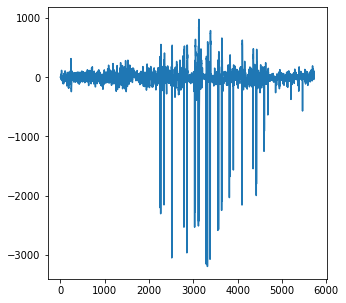

In [92]:
df["RA_detrend"].plot()

In [93]:
df

,Date,US dollar,year,month,detrended_ls,RA,RA_detrend
0,2021-02-12,1814,2021,February,-311.854111,NaN,2.500000
1,2021-02-11,1842,2021,February,-283.723792,NaN,2.500000
2,2021-02-10,1829,2021,February,-296.593474,NaN,2.500000
3,2021-02-09,1811,2021,February,-314.463156,NaN,2.500000
4,2021-02-08,1756,2021,February,-369.332838,NaN,2.500000
...,...,...,...,...,...,...,...
5719,1999-01-08,1501,1999,January,120.435912,1469.750000,31.250000
5720,1999-01-07,1483,1999,January,102.566231,1472.166667,10.833333
5721,1999-01-06,1559,1999,January,178.696549,1481.916667,77.083333
5722,1999-01-05,1598,1999,January,217.826867,1494.666667,103.333333


Detrending by shifting values
---

In [94]:
df['lag'] = df["US dollar"].shift()
df['detrend_lag'] = df["US dollar"] - df["lag"]

In [100]:
df["detrend_lag"].fillna(df["detrend_lag"].median(), inplace=True)

<AxesSubplot:>

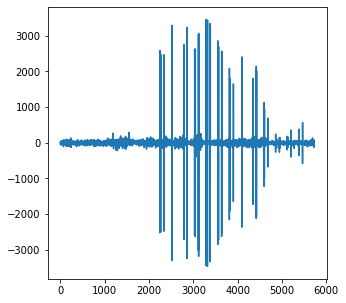

In [101]:
df["detrend_lag"].plot()

In [102]:
is_stat(df["detrend_lag"])

ADF Statistic: -28.445900808495036
p-value: 0.0
Critial Values:
   1%, -3.431496153332666
Critial Values:
   5%, -2.8620464896627316
Critial Values:
   10%, -2.567039602683309

KPSS Statistic: 0.033943
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


Again, we see that shifting the data manages to detrend the series successfully. Since there is not much of a 
seasonal component to this particular time series, detrending will make it stationary. 

In [105]:
df[["US dollar", "RA_detrend",  "detrend_lag"]]

,US dollar,RA_detrend,detrend_lag
0,1814,2.500000,0.0
1,1842,2.500000,28.0
2,1829,2.500000,-13.0
3,1811,2.500000,-18.0
4,1756,2.500000,-55.0
...,...,...,...
5719,1501,31.250000,58.0
5720,1483,10.833333,-18.0
5721,1559,77.083333,76.0
5722,1598,103.333333,39.0


In [106]:
df

,Date,US dollar,year,month,detrended_ls,RA,RA_detrend,lag,detrend_lag
0,2021-02-12,1814,2021,February,-311.854111,NaN,2.500000,NaN,0.0
1,2021-02-11,1842,2021,February,-283.723792,NaN,2.500000,1814.0,28.0
2,2021-02-10,1829,2021,February,-296.593474,NaN,2.500000,1842.0,-13.0
3,2021-02-09,1811,2021,February,-314.463156,NaN,2.500000,1829.0,-18.0
4,2021-02-08,1756,2021,February,-369.332838,NaN,2.500000,1811.0,-55.0
...,...,...,...,...,...,...,...,...,...
5719,1999-01-08,1501,1999,January,120.435912,1469.750000,31.250000,1443.0,58.0
5720,1999-01-07,1483,1999,January,102.566231,1472.166667,10.833333,1501.0,-18.0
5721,1999-01-06,1559,1999,January,178.696549,1481.916667,77.083333,1483.0,76.0
5722,1999-01-05,1598,1999,January,217.826867,1494.666667,103.333333,1559.0,39.0


Prediction using ARIMA
---

In [120]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df["US dollar"], order=(5,1,0))
model_fit_1 = model.fit()
print(model_fit_1.summary())

                               SARIMAX Results                                
Dep. Variable:              US dollar   No. Observations:                 5724
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -39265.223
Date:                Sat, 27 Feb 2021   AIC                          78542.446
Time:                        11:43:04   BIC                          78582.359
Sample:                             0   HQIC                         78556.340
                               - 5724                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4737      0.003   -173.247      0.000      -0.479      -0.468
ar.L2         -0.4950      0.004   -124.614      0.000      -0.503      -0.487
ar.L3         -0.3615      0.005    -69.969      0.0

<Figure size 1152x864 with 0 Axes>

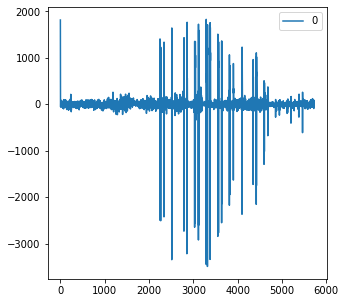

In [121]:
plt.figure(figsize=(16, 12))
residuals=pd.DataFrame(model_fit_1.resid)
residuals.plot()
plt.show()

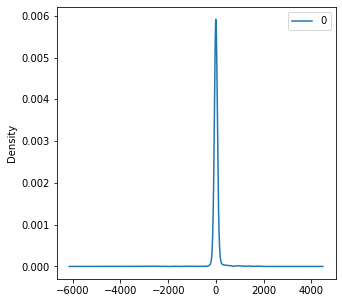

In [122]:
residuals.plot(kind='kde')
plt.show()

In [123]:
print(residuals.describe())

                 0
count  5724.000000
mean      0.224516
std     232.135484
min   -3489.358709
25%     -32.938032
50%       0.504815
75%      34.957554
max    1827.820816


In [124]:
model=ARIMA(df["US dollar"], order=(2,3,2))
model_fit_2 = model.fit()
print(model_fit_2.summary())

/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/rishibaijal/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:              US dollar   No. Observations:                 5724
Model:                 ARIMA(2, 3, 2)   Log Likelihood              -39596.631
Date:                Sat, 27 Feb 2021   AIC                          79203.262
Time:                        11:43:35   BIC                          79236.522
Sample:                             0   HQIC                         79214.840
                               - 5724                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3301      0.003   -129.632      0.000      -0.335      -0.325
ar.L2         -0.3204      0.003   -122.246      0.000      -0.326      -0.315
ma.L1         -1.9991      0.001  -2327.494      0.0

<Figure size 1152x864 with 0 Axes>

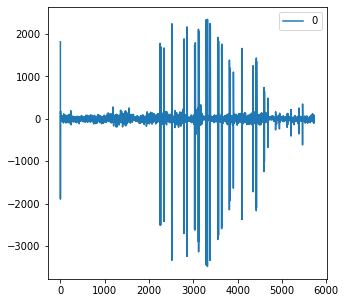

In [125]:
plt.figure(figsize=(16, 12))
residuals=pd.DataFrame(model_fit_2.resid)
residuals.plot()
plt.show()

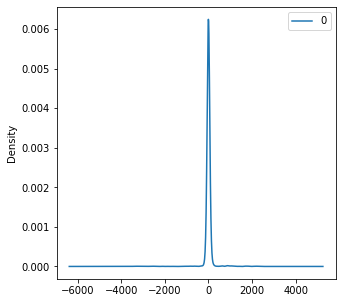

In [126]:
residuals.plot(kind='kde')
plt.show()

In [127]:
print(residuals.describe())

                 0
count  5724.000000
mean      0.302403
std     247.206247
min   -3476.183367
25%     -27.203959
50%       0.403284
75%      29.096469
max    2340.659658


ARIMA walk forward
---

In [131]:
X=df["US dollar"]

In [149]:
size = int(len(X) * 0.97)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [150]:
print(len(test))

172


In [151]:
for i in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = list(model_fit.forecast())
    print(output, type(output))
    predictions.append(output[0])
    obs = list(test)[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))

[755.9766843747041] <class 'list'>
predicted=1597.070911, expected=732.000000
[752.6436631634807] <class 'list'>
predicted=1597.070911, expected=684.000000
[731.8468055859713] <class 'list'>
predicted=1597.070911, expected=681.000000
[721.4462073619993] <class 'list'>
predicted=1597.070911, expected=682.000000
[706.052399369176] <class 'list'>
predicted=1597.070911, expected=673.000000
[687.802270656254] <class 'list'>
predicted=1597.070911, expected=704.000000
[694.9214937328836] <class 'list'>
predicted=1597.070911, expected=754.000000
[718.043073180138] <class 'list'>
predicted=1597.070911, expected=791.000000
[739.1960361494638] <class 'list'>
predicted=1597.070911, expected=708.000000
[705.0010933912505] <class 'list'>
predicted=1597.070911, expected=708.000000
[725.303263534284] <class 'list'>
predicted=1597.070911, expected=711.000000
[731.3844621059724] <class 'list'>
predicted=1597.070911, expected=721.000000
[730.3660629797787] <class 'list'>
predicted=1597.070911, expected=7

[859.9294087141045] <class 'list'>
predicted=1597.070911, expected=848.000000
[864.8188751440362] <class 'list'>
predicted=1597.070911, expected=859.000000
[865.7229660798814] <class 'list'>
predicted=1597.070911, expected=859.000000
[858.2987430177301] <class 'list'>
predicted=1597.070911, expected=843.000000
[844.3331130578957] <class 'list'>
predicted=1597.070911, expected=819.000000
[835.8128684833073] <class 'list'>
predicted=1597.070911, expected=811.000000
[832.2571416913305] <class 'list'>
predicted=1597.070911, expected=889.000000
[867.8138338539875] <class 'list'>
predicted=1597.070911, expected=946.000000
[888.2594590761913] <class 'list'>
predicted=1597.070911, expected=967.000000
[902.6248443238397] <class 'list'>
predicted=1597.070911, expected=945.000000
[909.2396642162067] <class 'list'>
predicted=1597.070911, expected=920.000000
[922.4426361069096] <class 'list'>
predicted=1597.070911, expected=958.000000
[955.1020638983078] <class 'list'>
predicted=1597.070911, expect

In [154]:
from sklearn.metrics import mean_squared_error
rmse=(mean_squared_error(test, predictions)**0.5)

In [155]:
print(rmse)

44.461162286762786


In [157]:
from sklearn.metrics import mean_absolute_percentage_error
mape=(mean_absolute_percentage_error(test, predictions))
print(mape)

0.039167114251033475


In [161]:
predictions_1=[]
history_1=[x for x in train]
for i in range(len(test)):
    model = ARIMA(history_1, order=(3,2,1))
    model_fit = model.fit()
    output = list(model_fit.forecast())
    print(output, type(output))
    predictions_1.append(output[0])
    obs = list(test)[i]
    history_1.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))

[760.6045938057719] <class 'list'>
predicted=760.604594, expected=732.000000
[758.419178565634] <class 'list'>
predicted=758.419179, expected=684.000000
[722.0916118134775] <class 'list'>
predicted=722.091612, expected=681.000000
[708.7245507347151] <class 'list'>
predicted=708.724551, expected=682.000000
[695.5495196544356] <class 'list'>
predicted=695.549520, expected=673.000000
[676.7672431308124] <class 'list'>
predicted=676.767243, expected=704.000000
[694.0233430530478] <class 'list'>
predicted=694.023343, expected=754.000000
[722.3473825379095] <class 'list'>
predicted=722.347383, expected=791.000000
[746.0368949743644] <class 'list'>
predicted=746.036895, expected=708.000000
[713.4796936958817] <class 'list'>
predicted=713.479694, expected=708.000000
[731.6269413286653] <class 'list'>
predicted=731.626941, expected=711.000000
[732.0745781997902] <class 'list'>
predicted=732.074578, expected=721.000000
[715.1722105948099] <class 'list'>
predicted=715.172211, expected=791.000000


[864.5294344034196] <class 'list'>
predicted=864.529434, expected=859.000000
[862.1084282361634] <class 'list'>
predicted=862.108428, expected=859.000000
[849.4784081937115] <class 'list'>
predicted=849.478408, expected=843.000000
[846.350012323096] <class 'list'>
predicted=846.350012, expected=819.000000
[835.2908860104318] <class 'list'>
predicted=835.290886, expected=811.000000
[828.252021569937] <class 'list'>
predicted=828.252022, expected=889.000000
[865.8302375227835] <class 'list'>
predicted=865.830238, expected=946.000000
[891.8863727934344] <class 'list'>
predicted=891.886373, expected=967.000000
[913.087121314278] <class 'list'>
predicted=913.087121, expected=945.000000
[929.6693322294816] <class 'list'>
predicted=929.669332, expected=920.000000
[933.4667588229285] <class 'list'>
predicted=933.466759, expected=958.000000
[958.0754375092503] <class 'list'>
predicted=958.075438, expected=1035.000000
[993.651938989004] <class 'list'>
predicted=993.651939, expected=998.000000
[9

In [162]:
rmse=(mean_squared_error(test, predictions_1)**0.5)
mape=(mean_absolute_percentage_error(test, predictions))
print(rmse)
print(mape)

42.52315468267342
0.039167114251033475


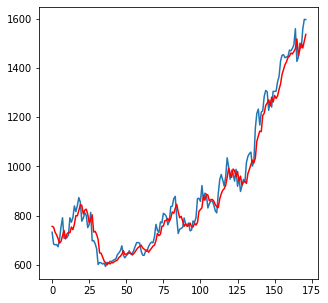

In [168]:
plt.plot(list(test))
plt.plot(predictions, color='red')
plt.show()

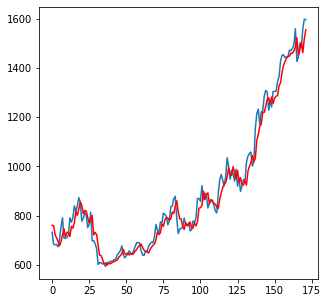

In [169]:
plt.plot(list(test))
plt.plot(predictions_1, color='red')
plt.show()